<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Yosef, my name is Dmitrii. I'm going to review your project! Nice to meet you! 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>
    
<b>Overall Feedback</b> 
    
    
- Overall well done! I can see that a lot of effort has been made! Your project already looks really good and you accomplished impressive results.
- It is great that you can use different methods for data processing and apply them to real data and project tasks, keep it up! One minor remark is that it will be great to spend more time formulating your conclusions and observations after each question in the project.
- There is only one critical issue to be fixed: 
    - Can you please check other columns with missing data and make a decision about them.
   

I will wait for you to send me a new version of the project :)
    
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 

Thank you for leaving your comments/feedback and improving you project! 
Please keep up the great work and good luck on the next project :)
</div>

# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain yourself the purposes of the project and actions you plan to take.]
In this study my purpose is to seek what is influence car pricing.
In order to do that I'll start the data preproccessing proccess which mean,
seeking and filling the missing values and drop some of them if it necessary.
Afterword I'll jump into the data and start find connection between all the factors 
using histograms etc.

[Please bear in mind that studying, amending and analyzing data is an iterative process. It is normal to return back to previous steps and correct/expand them to allow for further steps.]

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- Great that you added additional information about project tasks. It gives an overview of what you are going to achieve in this project.


## Initialization

[Load libraries that you believe are required for the project. You may realise later that you need additional libraries as you go, which is totally fine - just make sure to update this section when you do.]

In [1]:
# Loading all the libraries
import pandas as pd



### Load data

[Load the project data and have a look at the general information.]

In [2]:
# Load the data file into a DataFrame
crankshaft_list = pd.read_csv('/datasets/vehicles_us.csv')


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

[Understanding the fields, explore them to make yourself familiar with the data.]

In [3]:
# print the general/summary information about the DataFrame
crankshaft_list.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data
print(crankshaft_list)


       price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500         NaN      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       NaN   

      transmission    type 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
A good start and first view on data. 

Also great that all imports and data load are grouped in different cells before the project and try/except has been used.


</div>

[Describe what you notice in the general information and the printed data sample. Are there any issues that may need further investigation and changes?]
There are several missing values at is_4wd column need to be checked.

In [5]:
crankshaft_list['is_4wd']

0        1.0
1        1.0
2        NaN
3        NaN
4        NaN
        ... 
51520    NaN
51521    NaN
51522    NaN
51523    NaN
51524    NaN
Name: is_4wd, Length: 51525, dtype: float64

[Are there columns with inappropriate data types?]
date_posted column need to be change into datetime object.

In [6]:
crankshaft_list['date_posted'] = pd.to_datetime(crankshaft_list['date_posted'], format='%Y-%m-%d')


[Are there missing values across all columns or just a few? What columns contain the most missing values? Briefly describe what you see in 1-2 sentences.]
There are a lot of missing values in is_4wd column.

In [7]:
crankshaft_list.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
It is always helpful to calculate the percentage of missing values. It helps to understand the overall impact and to make a more weighted decision regarding what to do next.
    

### Conclusions and further steps

[Formulate your conclusions regarding the initial data. What do you think looks normal and what does not not?]
Everything looks good excepts that there are alot of missing values which need to be fixed.

[Explain your next steps and how they correlate with the conclusions you made so far. Specifically, it should be clear what part of data should be treated to make it more suitable for the required analysis.]
First I'll handle the missing values.

In [9]:
crankshaft_list.loc[crankshaft_list['is_4wd'].isna(), 'is_4wd'] = 0

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>


**`is_4wd`**
    
Indeed, `is_4wd` contains a boolean type of information (yes/no). So filling missing data with 0 will allow us to keep a potentially useful feature. 


## Treat missing values (if any)

[Study missing values for each column in more details and decide what to do with them based on meaningful hypotheses.]

In [10]:
crankshaft_list['is_4wd'].isna().sum()

0

In [11]:
print('The mean for model of year is:')
print(crankshaft_list['model_year'].mean())
print('The maximum and minimum values are:')
print(max(crankshaft_list['model_year']) , min(crankshaft_list['model_year']))
print('The median value is:')
print(crankshaft_list['model_year'].median())
print("I'll use median to fill in the missing values in model_year column")
crankshaft_list['model_year'].fillna(value=crankshaft_list['model_year'].median(), inplace=True)
#let check if the missing values are solved
crankshaft_list['model_year'].isna().sum()

The mean for model of year is:
2009.75046966977
The maximum and minimum values are:
2019.0 1908.0
The median value is:
2011.0
I'll use median to fill in the missing values in model_year column


0

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>

You have done great work with missing values.
It is indeed more beneficial to try to restore missing data, as by deleting it we can lose potentially important insights. 

**`model_year`**
  
Potentially model_year could be also correlated with car moder or condition.



In [12]:
print('The mean for odometer is:')
print(crankshaft_list['odometer'].mean())
print('The maximum and minimum values are:')
print(max(crankshaft_list['odometer']) , min(crankshaft_list['odometer']))
#let check if the missing values are solved
crankshaft_list['odometer'].isna().sum()
print('The median value is:')
print(crankshaft_list['odometer'].median())
#let fill up the missing values
crankshaft_list['odometer'].fillna(value=crankshaft_list['odometer'].median(), inplace=True)
#lets check if there are any missing values
print(crankshaft_list['odometer'].isna().sum())

The mean for odometer is:
115553.4617376756
The maximum and minimum values are:
990000.0 0.0
The median value is:
113000.0
0


<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>

    
**`odometer`** 

Well done with missing values in odometer! Another approach could be to again use groupped values by model_year or car condition.    

</div>

In [13]:
print('The mean for cylinders is:')
print(crankshaft_list['cylinders'].mean())
print('The maximum and minimum values are:')
print(max(crankshaft_list['cylinders']) , min(crankshaft_list['cylinders']))
#let check if the missing values are solved
crankshaft_list['cylinders'].isna().sum()
print('The median value is:')
print(crankshaft_list['cylinders'].median())
crankshaft_list['cylinders'].fillna(value=crankshaft_list['cylinders'].mean(), inplace=True)
#lets see if there are missing values
crankshaft_list['cylinders'].isna().sum()

The mean for cylinders is:
6.125235058899817
The maximum and minimum values are:
12.0 3.0
The median value is:
6.0


0

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>


**`cylinders`** 

Thanks for adding that. Here either type or car model can be also used to find more relevant value. 
    


In [14]:
crankshaft_list['paint_color'].fillna(value='Unknown', inplace=True)
#lets check if there are more missing values
crankshaft_list['paint_color'].isna().sum()

0

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>

**`paint_color`**   

Here indeed I can recommend to fill it with 'unknown' or any other placeholder, as it is not possible to fill this value based on other car features.


In [15]:
crankshaft_list.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## Fix data types

[As the data is more or less complete now, fix the data types if required.]

In [16]:
crankshaft_list['date_posted'] = pd.to_datetime(crankshaft_list['date_posted'], format='%Y-%m-%d')
crankshaft_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null float64
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null float64
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Great that you checked data types, but can you please add solution for other columns with missing data:
    
    - **`model_year`**
    - **`cylinders`**  
    - **`odometer`**  
    - **`paint_color`**   
    

## Enrich data

[Add additional factors to the data to make the analysis easier.]

In [17]:
# Add datetime values for when the ad was placed
crankshaft_list['year_placed'] = pd.DatetimeIndex(crankshaft_list['date_posted']).year

In [18]:
# Add the vehicle's age when the ad was placed
crankshaft_list['vehicle_age'] = pd.to_datetime("now").year - crankshaft_list['model_year']
print(crankshaft_list['vehicle_age'])


0        10.0
1        10.0
2         8.0
3        18.0
4         4.0
         ... 
51520     8.0
51521    19.0
51522    12.0
51523     8.0
51524     7.0
Name: vehicle_age, Length: 51525, dtype: float64


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Here you can slso add  +1 to the equation above to take into account the current year. Otherwise, it will lead to multiple 0 in `vehicle_age` (as below) and as a result infinite values in `avg_mileage`. 



In [19]:
# Add the vehicle's average mileage per year
crankshaft_list['avg_mileage'] = crankshaft_list['odometer'] / crankshaft_list['vehicle_age']
crankshaft_list['avg_mileage']

0        14500.000000
1         8870.500000
2        13750.000000
3         6277.777778
4        20225.750000
             ...     
51520    11017.000000
51521     9552.631579
51522    10666.666667
51523    17446.625000
51524    16142.857143
Name: avg_mileage, Length: 51525, dtype: float64

In [20]:
# It might help to replace the condition values with something that can be manipulated more easily




## Check clean data

[Given the data is ready for the analysis, take just another quick look at it. It is helpful to see what exactly you are going to use for the analysis.]

In [21]:
# print the general/summary information about the DataFrame
crankshaft_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null float64
fuel            51525 non-null object
odometer        51525 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null float64
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
year_placed     51525 non-null int64
vehicle_age     51525 non-null float64
avg_mileage     51525 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(6)
memory usage: 6.3+ MB


In [22]:
# print a sample of data
crankshaft_list

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_placed,vehicle_age,avg_mileage
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,Unknown,1.0,2018-06-23,19,2018,10.0,14500.000000
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2018,10.0,8870.500000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019,8.0,13750.000000
3,1500,2003.0,ford f-150,fair,8.0,gas,113000.0,automatic,pickup,Unknown,0.0,2019-03-22,9,2019,18.0,6277.777778
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019,4.0,20225.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2018,8.0,11017.000000
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2018,19.0,9552.631579
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,2018,12.0,10666.666667
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,2018,8.0,17446.625000


## Study core parameters

[Choose an appropriate approach to study the parameters listed below, pay special attention to how outliers affect the form and readability of the histograms.]

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

[If you find that you need to repeat the same jobs multiple times, think about what coding instrument might be helpful for such a thing to avoid duplicating your code.]

             price
type              
SUV           8900
bus          10500
convertible  12250
coupe        12950
hatchback     5980
mini-van      6495
offroad      11650
other         8995
pickup       14200
sedan         5995
truck        14995
van           7990
wagon         7900


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89bc9f4f10>]],
      dtype=object)

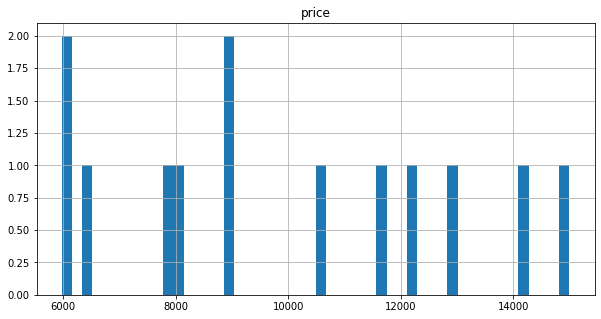

In [23]:
#Let's have a look at price histogram
good_data_price = crankshaft_list.pivot_table(
    index='type', values='price', aggfunc='median')
print(good_data_price)
good_data_price.hist(bins=50, figsize=(10,5))


             vehicle_age
type                    
SUV                 10.0
bus                 10.0
convertible         16.0
coupe               10.0
hatchback           10.0
mini-van            11.0
offroad             15.0
other               10.0
pickup              10.0
sedan               10.0
truck               10.0
van                 10.0
wagon               10.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89b3fb5650>]],
      dtype=object)

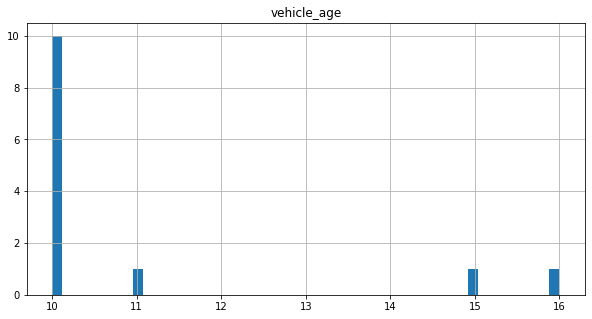

In [24]:
#Let's have a look at vehicle's age histogram
good_data_age = crankshaft_list.pivot_table(
    index='type', values='vehicle_age', aggfunc='median')
print(good_data_age)
good_data_age.hist(bins=50, figsize=(10,5))

             odometer
type                 
SUV          113000.0
bus          111352.5
convertible   90472.0
coupe         82350.0
hatchback    113000.0
mini-van     116000.0
offroad      113000.0
other        112218.0
pickup       113000.0
sedan        113000.0
truck        113000.0
van          113000.0
wagon        113000.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89b3e5a3d0>]],
      dtype=object)

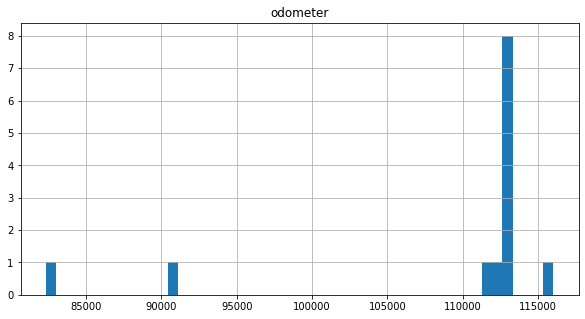

In [25]:
#Let's have a look at mileage histogram
good_data_mileage = crankshaft_list.pivot_table(
    index='type', values='odometer', aggfunc='median')
print(good_data_mileage)
good_data_mileage.hist(bins=50, figsize=(10,5))


             cylinders
type                  
SUV           6.000000
bus          10.000000
convertible   6.125235
coupe         6.000000
hatchback     4.000000
mini-van      6.000000
offroad       6.000000
other         6.000000
pickup        8.000000
sedan         4.000000
truck         8.000000
van           6.000000
wagon         4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89b3d60410>]],
      dtype=object)

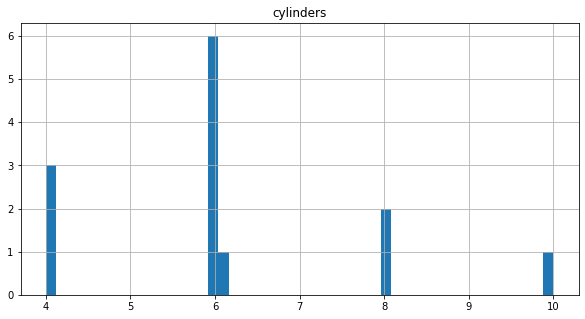

In [26]:
#Let's have a look at cylinders histogram
good_data_cylinder = crankshaft_list.pivot_table(
    index='type', values='cylinders', aggfunc='median')
print(good_data_cylinder)
good_data_cylinder.hist(bins=50, figsize=(10,5))


              avg_mileage
type                     
SUV          10862.888889
bus           5279.222222
convertible   5733.026738
coupe         7292.666667
hatchback    10900.000000
mini-van     11461.538462
offroad       7299.679487
other         9965.333333
pickup       10655.023077
sedan        10928.185714
truck        11263.500000
van          11416.666667
wagon        11300.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89b3f4c590>]],
      dtype=object)

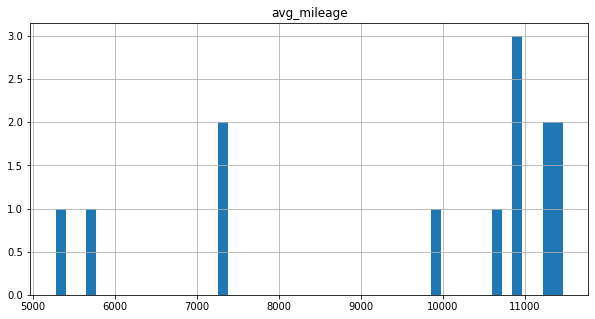

In [27]:
#Let's have a look at avarage mileage histogram
good_data_avg = crankshaft_list.pivot_table(
    index='type', values='avg_mileage', aggfunc='median')
print(good_data_avg)
good_data_avg.hist(bins=50, figsize=(10,5))


In [28]:
#Let find the correlation between all the data
final_data = good_data_price.join(good_data_age).join(good_data_mileage).join(good_data_avg)
final_data.corr()


,price,vehicle_age,odometer,avg_mileage
price,1.000000,0.253585,-0.414544,-0.410296
vehicle_age,0.253585,1.000000,-0.331866,-0.572890
odometer,-0.414544,-0.331866,1.000000,0.601468
avg_mileage,-0.410296,-0.572890,0.601468,1.000000


## Study and treat outliers

[Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers. Hint: Outliers can be identified by defining the lower/upper limits for normal range of values.]
Avarage mile column seem to has an outliers between 2000-4000.
Cylinder column seem to has outliers where there are row that describe 5 cylinder cars.


In [29]:
# Determine the lower limits for outliers
final_data = final_data.query('avg_mileage > 6000')


In [30]:
# Determine the upper limits for outliers



In [31]:
# Store data without outliers in a separate DataFrame
final_data


,price,vehicle_age,odometer,avg_mileage
type,,,,
SUV,8900,10.0,113000.0,10862.888889
coupe,12950,10.0,82350.0,7292.666667
hatchback,5980,10.0,113000.0,10900.000000
mini-van,6495,11.0,116000.0,11461.538462
offroad,11650,15.0,113000.0,7299.679487
other,8995,10.0,112218.0,9965.333333
pickup,14200,10.0,113000.0,10655.023077
sedan,5995,10.0,113000.0,10928.185714
truck,14995,10.0,113000.0,11263.500000


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
Great that you did not forget about outlers, but can you please elaborate why 4000 value has been used?

I calculated again and i used this value ( 6000) because there are a few outliers  that i can see in the histograms.
In the horizontal axis there a few values which are smaller significaly from the mean( the peek)
and they are not a large group so a omite them.

Btw you can additionally check a nice article about working with outliers:

https://www.pluralsight.com/guides/cleaning-up-data-from-outliers


## Study core parameters without outliers

[Use the filtered data to make new plots. Compare with the earlier ones (that included outliers). Draw conclusions for each.]

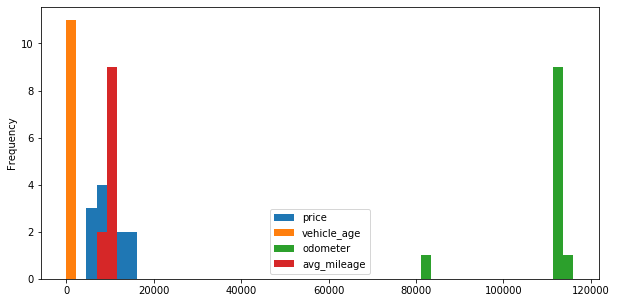

In [32]:
final_data.sort_values(by='price', ascending=True).plot(kind='hist',bins=50,  figsize=(10,5))

## Ads lifetime

[Study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.]

In [33]:
mean = crankshaft_list['days_listed'].mean()
median = crankshaft_list['days_listed'].median()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Typical lifetime of an ad has been correctly identified.

## Average price per each type of vehicle

[Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.]

             number_of_ads
type                      
SUV                  12405
bus                     24
convertible            446
coupe                 2303
hatchback             1047
mini-van              1161
offroad                214
other                  256
pickup                6988
sedan                12154
truck                12353
van                    633
wagon                 1541


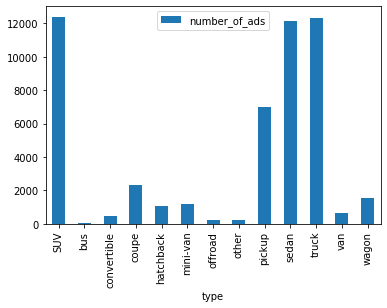

In [34]:
good_data_stat = crankshaft_list.pivot_table(
    index='type', values='days_listed', aggfunc='count') 
good_data_stat.columns = ['number_of_ads']
print(good_data_stat)
good_data_stat.plot(kind='bar')

## Price factors

[What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.]

[Make use of correlation matrix and correlation plots]

In [35]:
color_data = crankshaft_list.pivot_table(
     index='type', values='paint_color', aggfunc='count'
)
good_data_stat = good_data_stat.join(color_data['paint_color'])
good_data_stat = good_data_stat.join(good_data_price['price'])

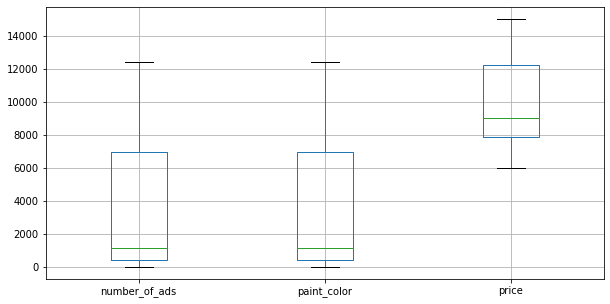

In [37]:
good_data_stat.plot(kind='box',figsize=(10,5), grid=True);

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
Для того, чтобы не показывать технические выводы python вроде "matplotlib.axes._subplots.AxesSubplot at 0x7f5feaf7fc90', можно в конце строки добавить точку с запятой или plt.show() 

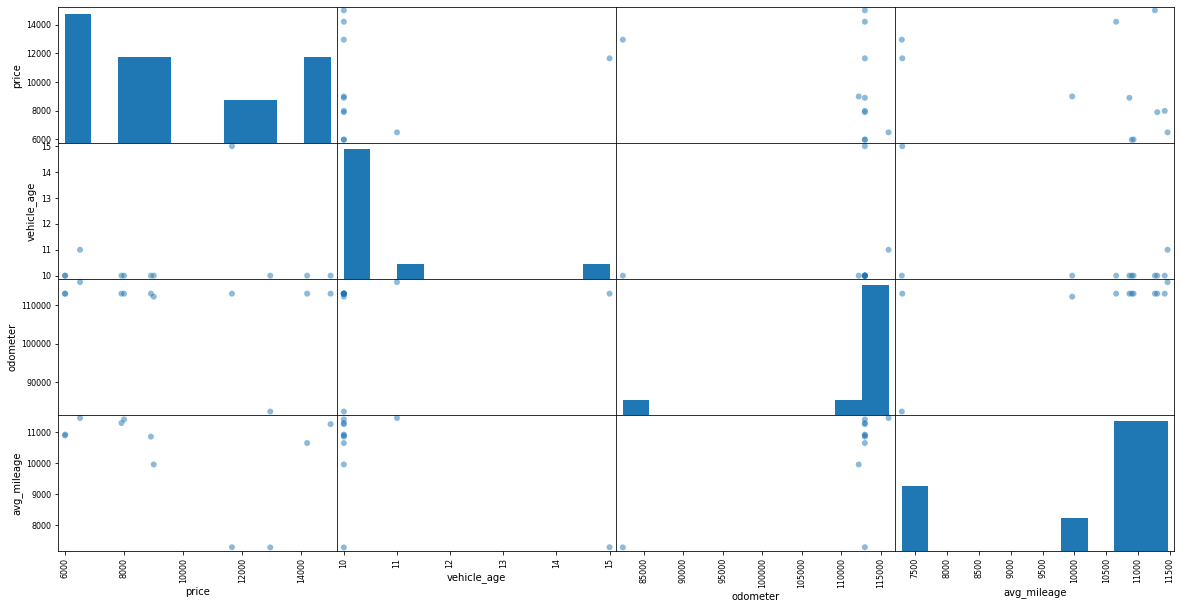

In [38]:
pd.plotting.scatter_matrix(final_data, figsize=(20,10), marker='-o');

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Overall an excellent data analysis with correct conclusions and different graph types.

Great that as an extra mile you additionally created correlation matrix to checked the correlation of different features.

</div>

## General conclusion

1.Replaced missing values in the following data with the following method.

2.Replaced data types in the following columns.

3.Added new info to the data and used it to calculate crucial information about.

4.Grouped the the neccesery data for plot.

5.plot hist and evaluate the parameters.

6.Grouped all the data into one filtered data with query.

7.plot overall histograms in order to find how much each of the parameters affect the price of a vehicle.

8.Make correlattion with method corr() in order to study the realationship of each parameters with the price.

(if it positive and tend to 1 then is the strongest bond which means the price is higher if the parameter is higher)





In [43]:
#From the chart i can tell that there is a connection between number of ads to the price,
#the more ads there are the more expensive the price is.
#There is also more connections but the most obvious fact for high price is vehicle_age.
#in here is the proof:

In [44]:
final_data.corr()

,price,vehicle_age,odometer,avg_mileage
price,1.000000,0.139423,-0.359290,-0.416524
vehicle_age,0.139423,1.000000,0.131206,-0.595151
odometer,-0.359290,0.131206,1.000000,0.664189
avg_mileage,-0.416524,-0.595151,0.664189,1.000000


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
 
Overall you did a great research. I left some feedback to check above and open questions to understand your reasoning. 
    
A small tip regarding overall conclusion: 
    It represents the overall work progress that you achieved. On a real project, this is probably the only thing the business will read. Therefore, it is crucial to indicate in a structured way all conclusions that you made on each step in the project.

For example:

- Replaced missing values in the following data with the following method.
- Replaced data types in the following columns.
- etc.
- We observe that ... factors impact ... 
- My analysis show ...
- I can recomend the following next steps / activities ...

It is also important to provide explanations and interpretations that will be interesting for business based on your analysis.

</div>